In [185]:
import matplotlib.pyplot as plt
import numpy
import numpy as np
from Dataset import load_scg

In [213]:
# !pip install ewtpy

In [188]:
signals_clean, labels_clean, duration, fs = load_scg(0, 'train')
signals_clean.shape

(5000, 1000)

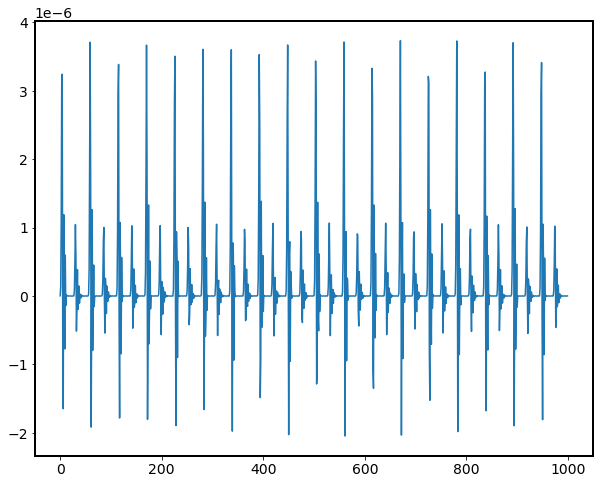

In [190]:
signal = signals_clean[10]
plt.plot((signal))

In [210]:
a = np.array([1, 3])
print(type([1, 2]) == list)

True


<class 'list'>


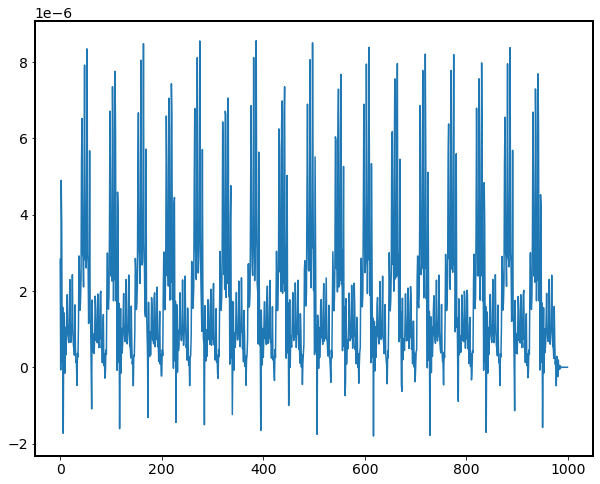

In [212]:
import numpy as np

def add_echo(signal, n_echo, attenuation_factor, delay_factor):
    if type(attenuation_factor) != list and type(attenuation_factor) != np.ndarray:
        raise ValueError("type of attenuation_factor must be list or numpy.ndarray")
    if type(delay_factor) != list and type(delay_factor) != np.ndarray:
        raise ValueError("type of delay_factor must be list or numpy.ndarray")

    if len(attenuation_factor) != n_echo or len(delay_factor) != n_echo:
        raise ValueError("len(attenuation_factor) and len(delay_factor) should be equal to n_echo")

    for a_factor, d_factory in zip(attenuation_factor, delay_factor):
        attenuation_signal = signal * a_factor
        attenuation_signal[:-d_factory] = attenuation_signal[d_factory:]
        attenuation_signal[-d_factory:] = 0
        signal += attenuation_signal

    return signal

sampling_rate = 100
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

original_signal = signal

# 衰减因子
attenuation_factor = [0.9, 0.9]
delay_factor = [5, 10]
print(type(attenuation_factor))
# 应用衰减效果
attenuated_signal = add_echo(original_signal, 2, attenuation_factor, delay_factor)

plt.plot(attenuated_signal)